In [1]:
%%time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import normalize

plt.rcParams['figure.figsize'] = 5.0, 4.0

from pyts.transformation import GADF,GASF
from sklearn.preprocessing import normalize

import uproot
import torch
from torch.utils.data import DataLoader
from torch.autograd import Variable

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

from heatmapcluster import heatmapcluster

CPU times: user 1.06 s, sys: 191 ms, total: 1.26 s
Wall time: 1.81 s


In [2]:
%%time
class Waveform1():
    
    def __init__(self, path=None, selector=None):
        if path is None:
            raise ValueError("Insert file path!")
            
        tree = uproot.open(path)["tree"]
        extra = np.arange(4096,4480)
        pmtall = tree.array("PMTALL")
        pmtall = np.delete(pmtall, extra, axis=1)
        pedestal = tree.array("Pedestal")
        pedestal_sum = pedestal[:,0]
        for i in range(len(pedestal_sum)):
            pmtall[i] = pedestal_sum[i] - pmtall[i]
        
        energy1 = tree.array("Energy")
        energy1 = energy1[:,1]
        
        label = np.load("label.npy")
        label2 = np.load("label_4.npy")
        survives = np.load("survives.npy")
        final = np.load("final.npy")
        final_final = np.load("final_final.npy")
        really_final = np.load("really_final.npy")
        
        selector1 = np.load("selector_pure.npy")
        
        waveform_n = normalize(pmtall,axis=1,norm="l2")
        del tree,pmtall,pedestal,pedestal_sum
        waveform_f = waveform_n[label==4]
        waveform_f = waveform_f[label2==1]
        waveform_f = waveform_f[survives==0]
        waveform_f = waveform_f[final==1]
        waveform_f = waveform_f[final_final==1]
        waveform_f = waveform_f[really_final==1]
        self.waveform = waveform_f[selector1==selector]
        
        energy1 = energy1[label==4]
        energy1 = energy1[label2==1]
        energy1 = energy1[survives==0]
        energy1 = energy1[final==1]
        energy1 = energy1[final_final==1]
        energy1 = energy1[really_final==1]
        self.energy = energy1[selector1==selector]
        del waveform_n,waveform_f
    
    def __len__(self):
        return self.waveform.shape[0]
    
    def __getitem__(self,idx):
        return self.waveform[idx],self.energy[idx]



CPU times: user 42 µs, sys: 0 ns, total: 42 µs
Wall time: 47.9 µs


In [3]:
%%time
class Waveform2():
    
    def __init__(self, path=None,selector=None):
        if path is None:
            raise ValueError("Insert file path!")

        tree = uproot.open(path)["tree"]
        extra = np.arange(4096,4480)
        pmtall = tree.array("PMTALL")
        pmtall = np.delete(pmtall, extra, axis=1)
        pedestal = tree.array("Pedestal")
        pedestal_sum = pedestal[:,0]
        
        energy2 = tree.array("Energy")
        energy2 = energy2[:,1]
        
        for i in range(len(pedestal_sum)):
            pmtall[i] = pedestal_sum[i] - pmtall[i]
        selector2 = np.load("selector_psd.npy")
    
        waveform_n = normalize(pmtall,axis=1,norm="l2")
        self.waveform = waveform_n[selector2==selector]
        self.energy = energy2[selector2==selector]
        del tree,pmtall
    def __len__(self):
        return self.waveform.shape[0]
    
    def __getitem__(self,idx):
        return self.waveform[idx],self.energy[idx]



CPU times: user 45 µs, sys: 0 ns, total: 45 µs
Wall time: 51 µs


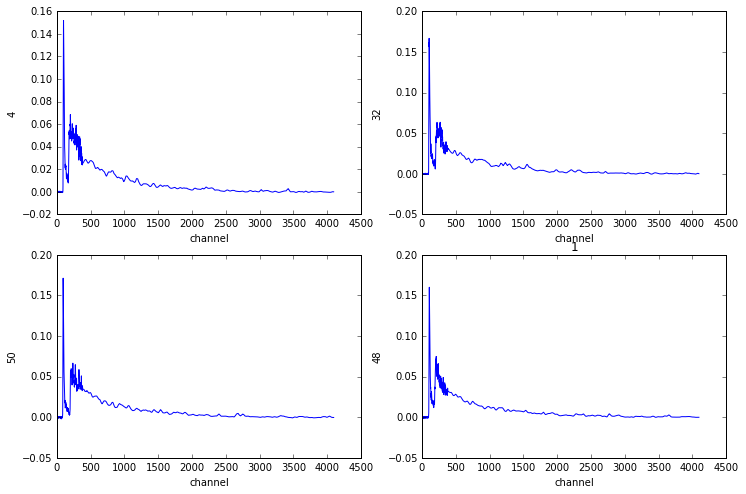

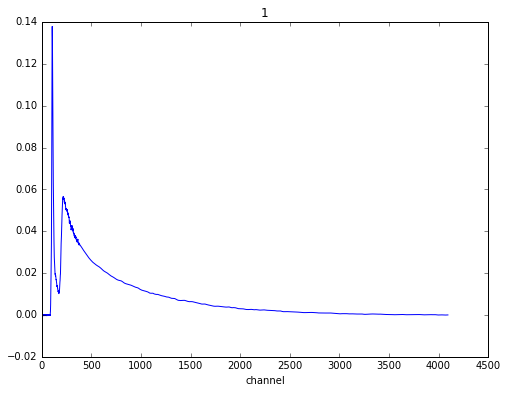

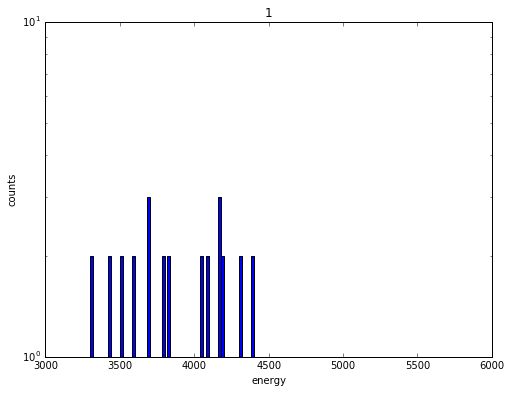

groups=1 counts= 53


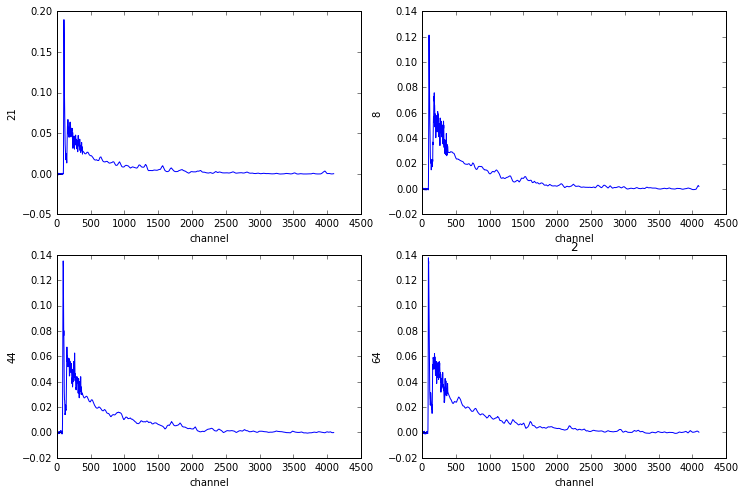

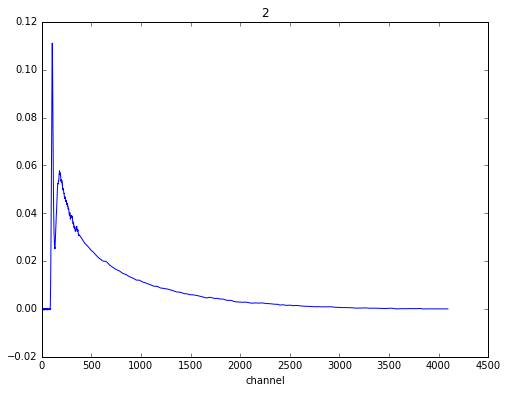

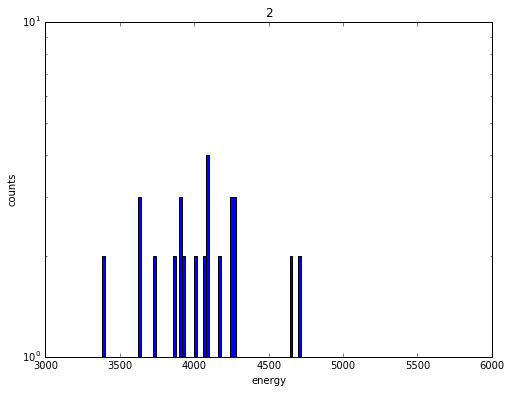

groups=2 counts= 66


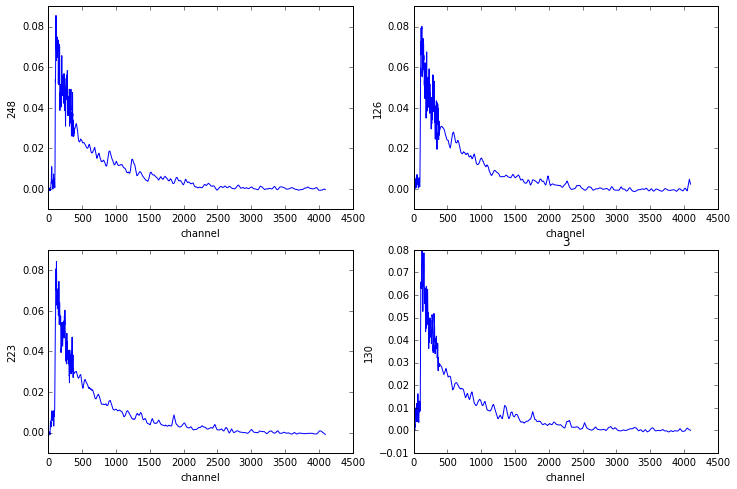

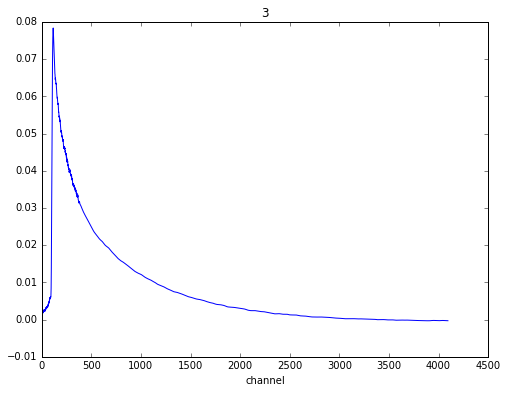

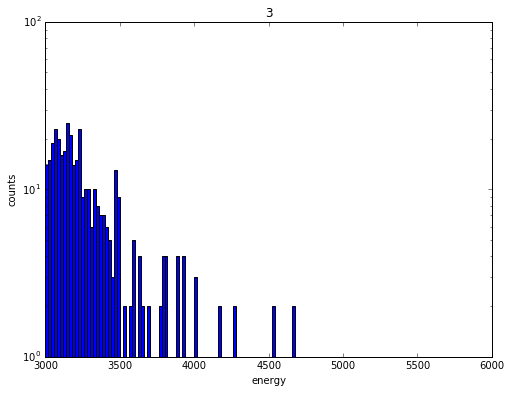

groups=3 counts= 390


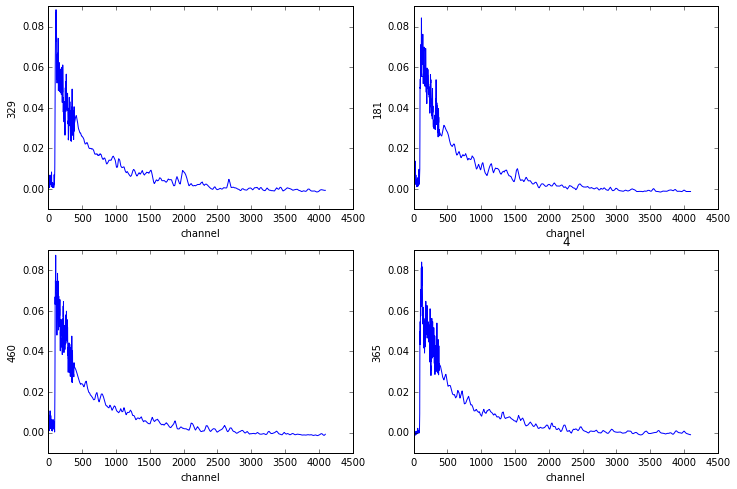

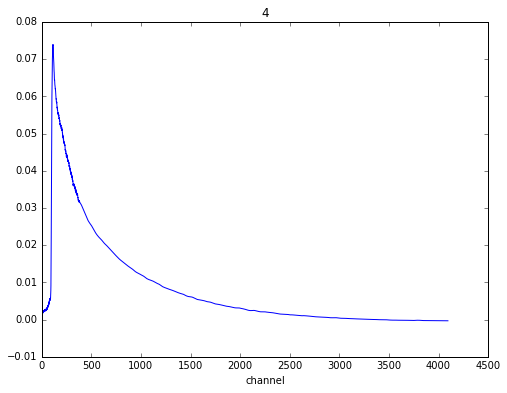

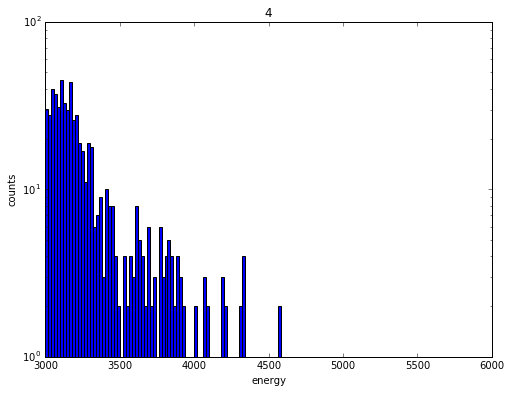

groups=4 counts= 626


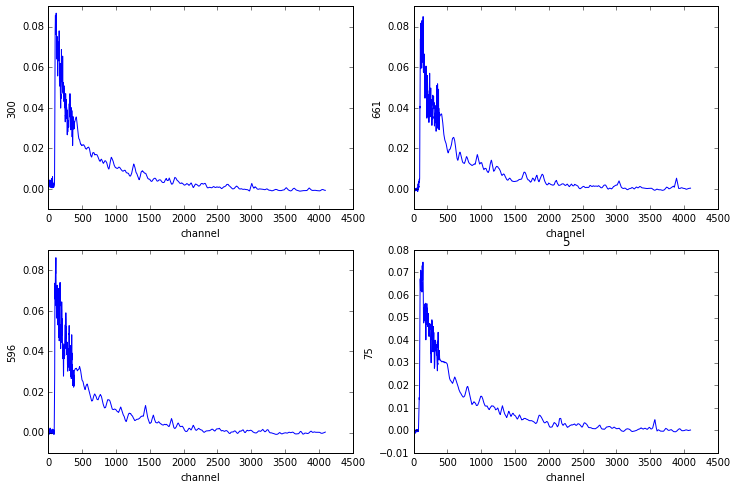

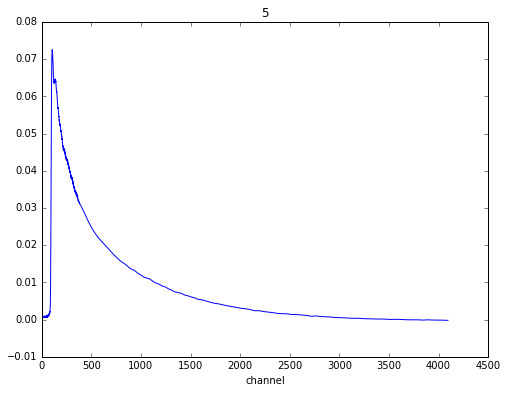

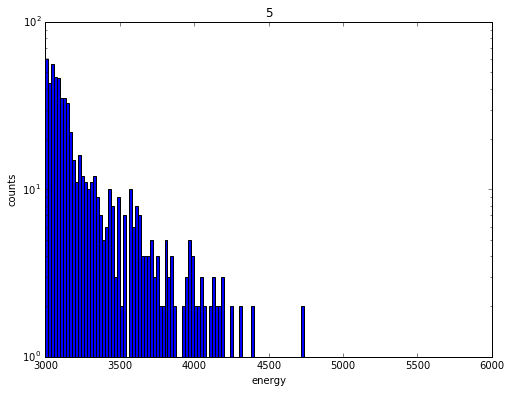

groups=5 counts= 669


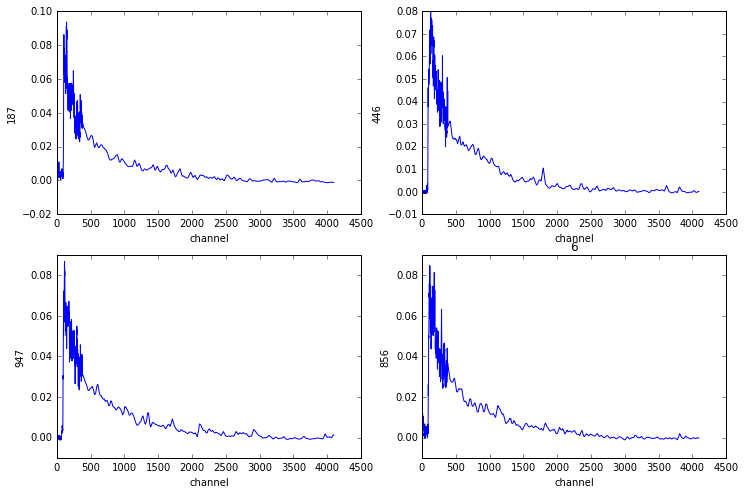

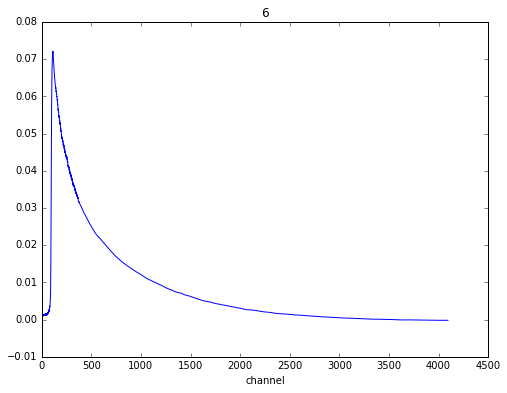

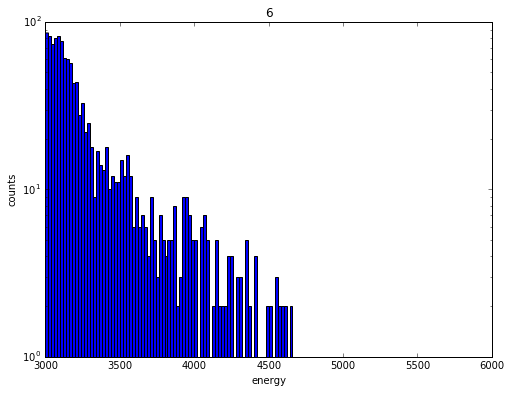

groups=6 counts= 1256


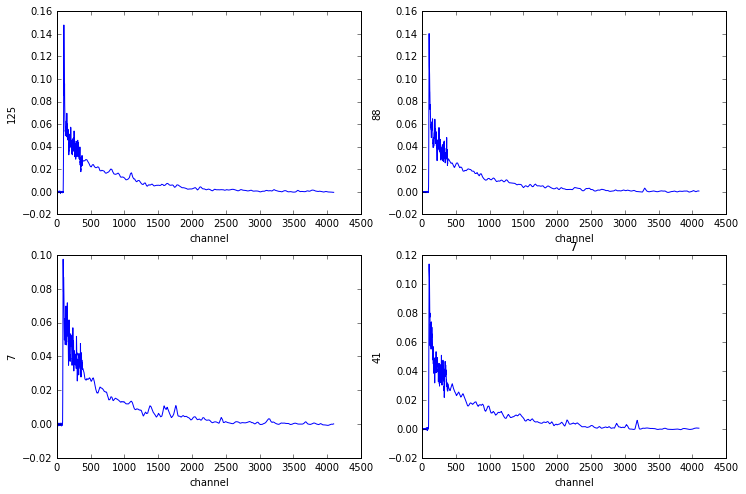

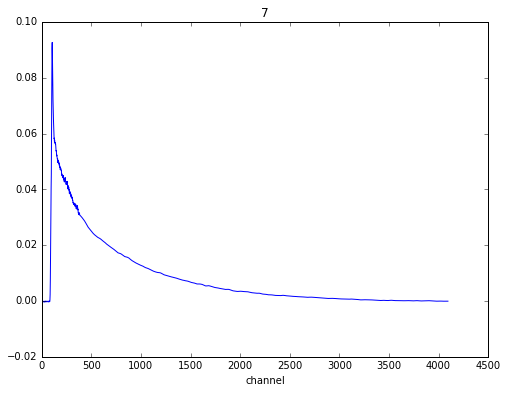

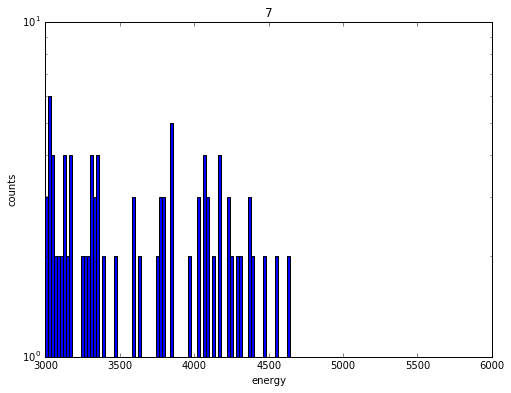

groups=7 counts= 141


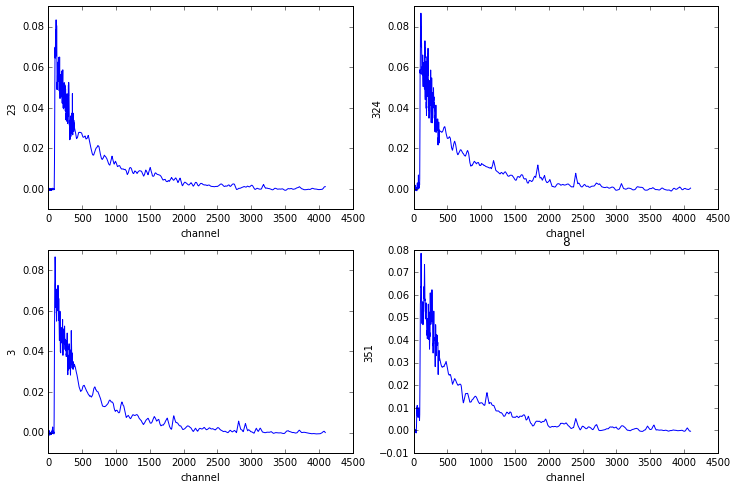

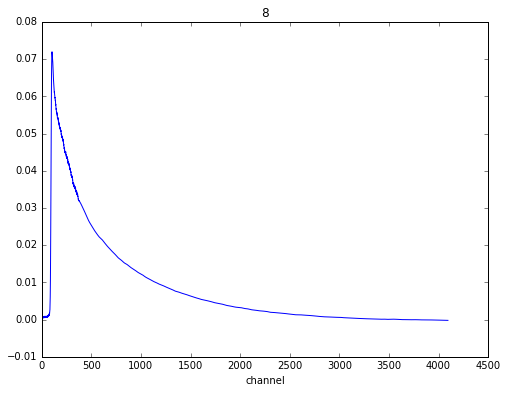

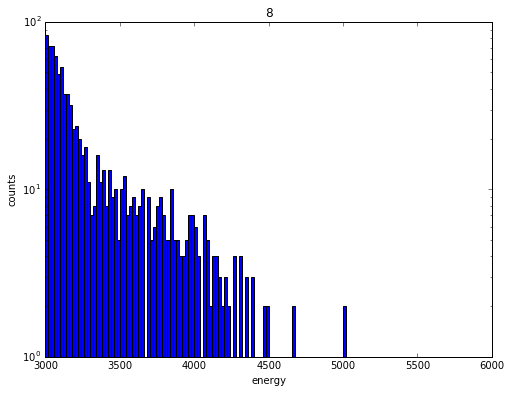

groups=8 counts= 967


In [4]:
sel1 = np.load("selector_pure.npy")

for i in np.unique(sel1):
    file = Waveform1(path="../Run9goodDataQ_dualgate.root", selector=i)
    r1 = np.random.randint(len(file[:][1])) 
    r2 = np.random.randint(len(file[:][1]))
    r3 = np.random.randint(len(file[:][1]))
    r4 = np.random.randint(len(file[:][1]))
    plt.figure(figsize=(12,8))
    plt.subplot(221)
    plt.plot(file[r1][0])
    plt.ylabel("{}".format(r1))
    plt.xlabel("channel")
    plt.subplot(222)
    plt.plot(file[r2][0])
    plt.ylabel("{}".format(r2))
    plt.xlabel("channel")
    plt.subplot(223)
    plt.plot(file[r3][0])
    plt.ylabel("{}".format(r3))
    plt.xlabel("channel")
    plt.subplot(224)
    plt.plot(file[r4][0])
    plt.ylabel("{}".format(r4))
    plt.xlabel("channel")
    plt.savefig("fig/wave_encode{}".format(i))
    plt.title("{}".format(i))
    plt.show()
    
    plt.figure(figsize=(8,6))
    plt.plot(np.mean(file[:][0],axis=0))
    plt.xlabel("channel")
    plt.savefig("fig/avwave_encode{}".format(i))
    plt.title("{}".format(i))
    plt.show()
    
    plt.figure(figsize=(8,6))
    plt.hist(file[:][1], bins=np.arange(3000,6000,20))
    plt.yscale("log")
    plt.xlabel("energy")
    plt.ylabel("counts")
    plt.savefig("fig/hist_encode{}".format(i))
    plt.title("{}".format(i))
    plt.show()
    print("groups={}".format(i), "counts=",len(file[:][1]))

# Alpha Beta separation, scurtinized

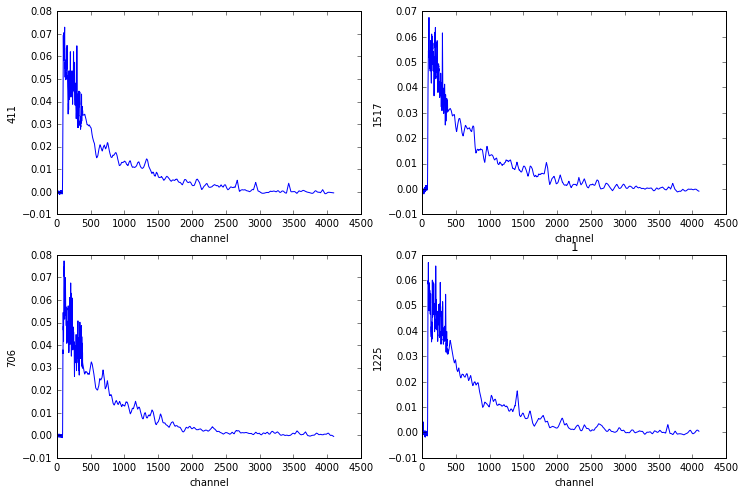

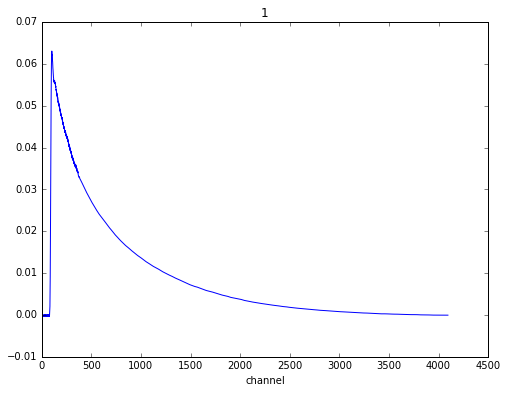

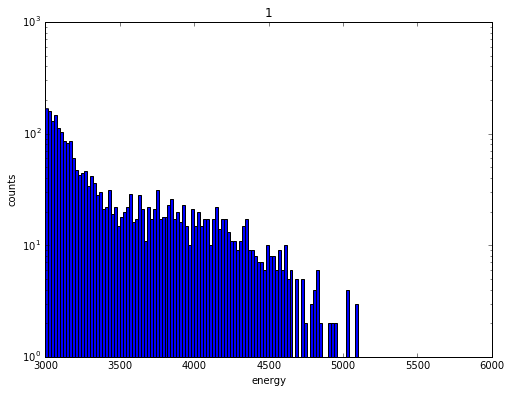

groups=1 counts= 2552


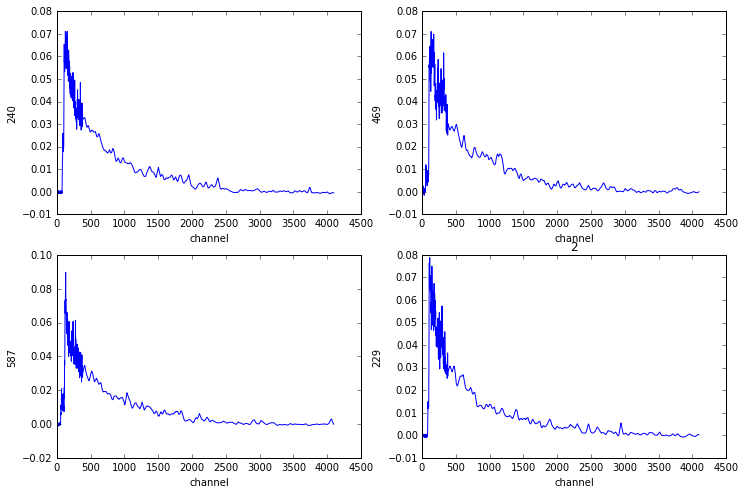

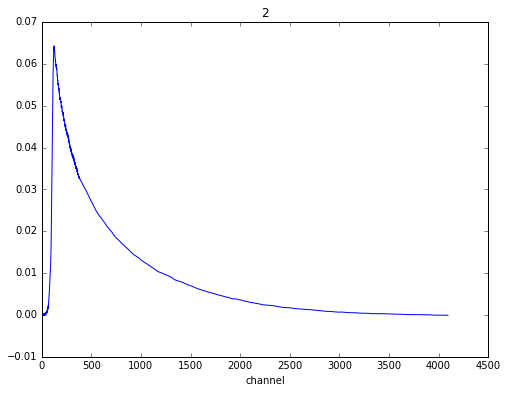

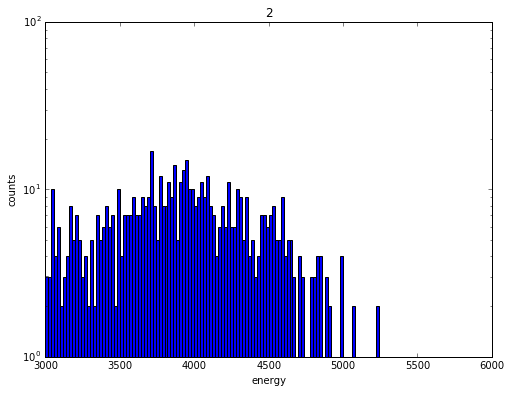

groups=2 counts= 640


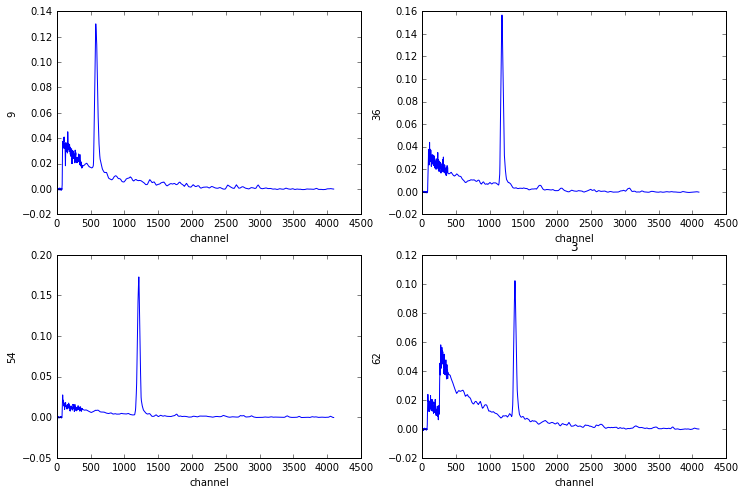

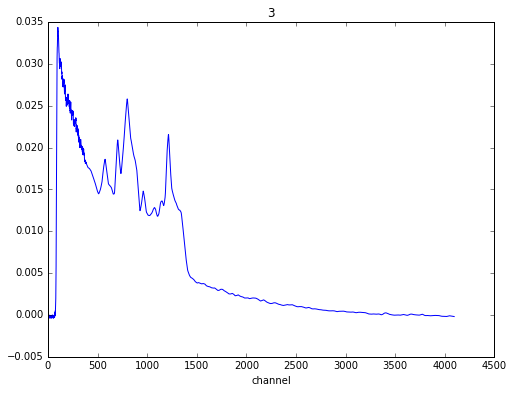

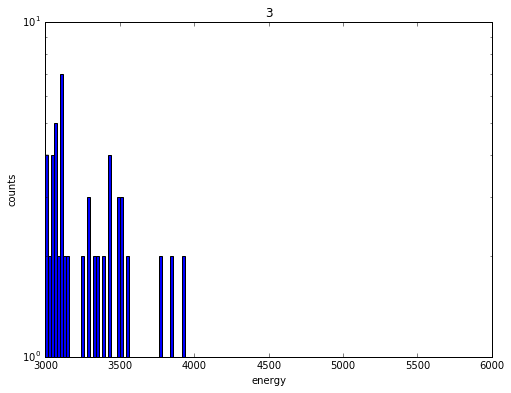

groups=3 counts= 71


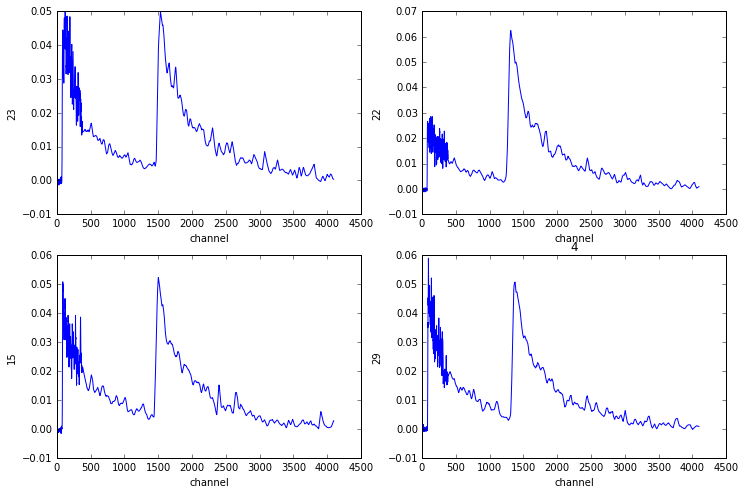

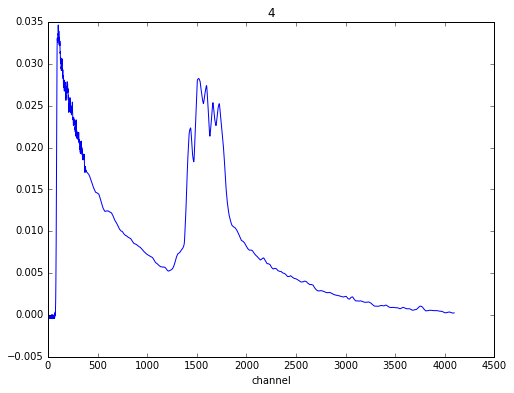

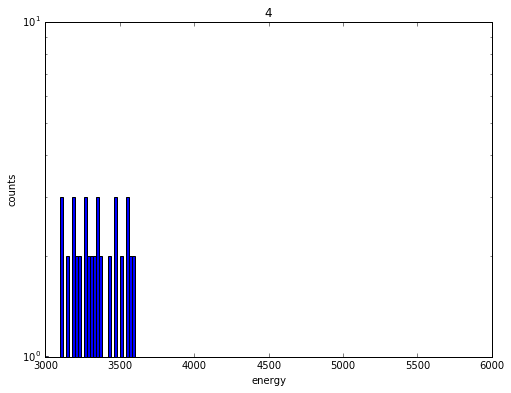

groups=4 counts= 58


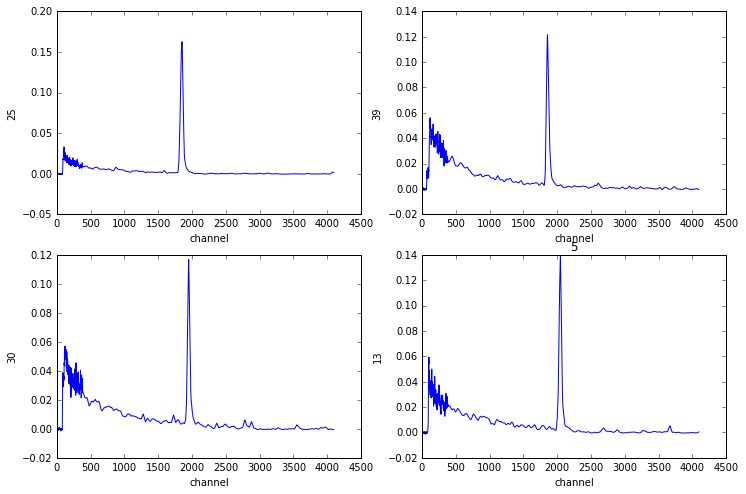

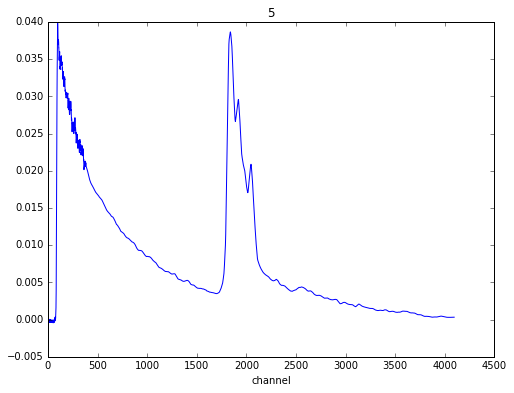

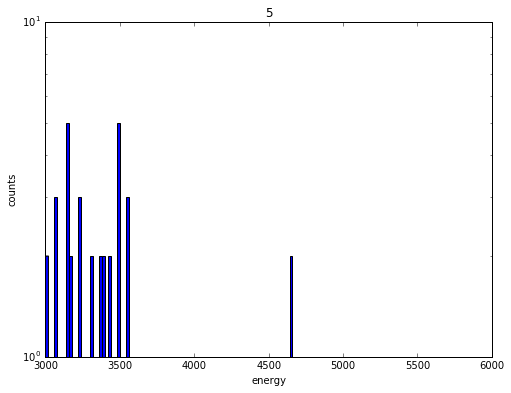

groups=5 counts= 48


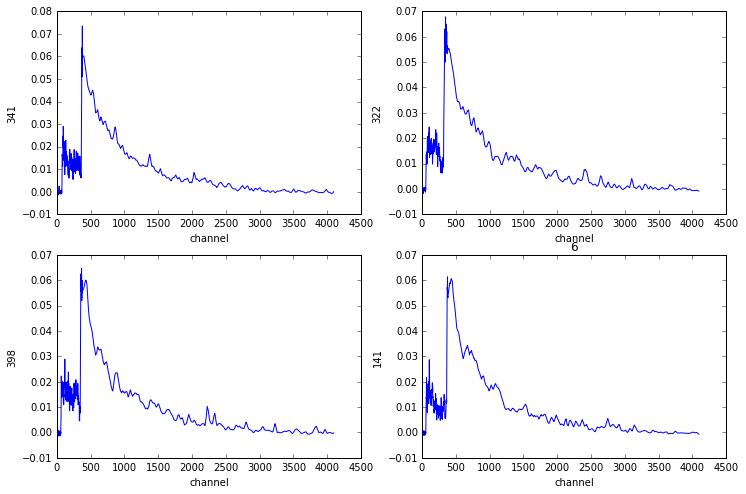

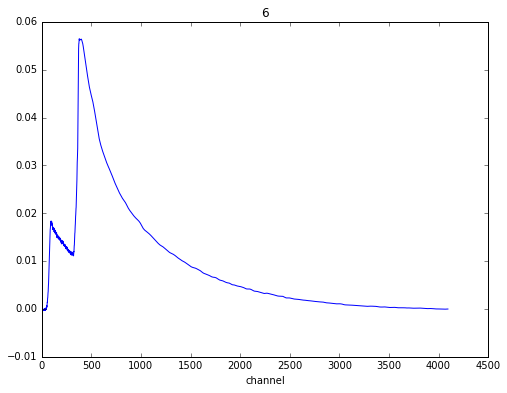

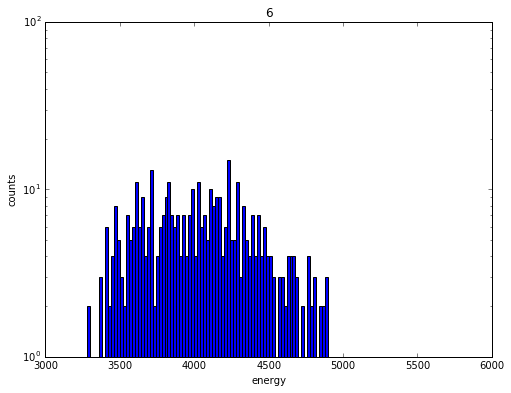

groups=6 counts= 420


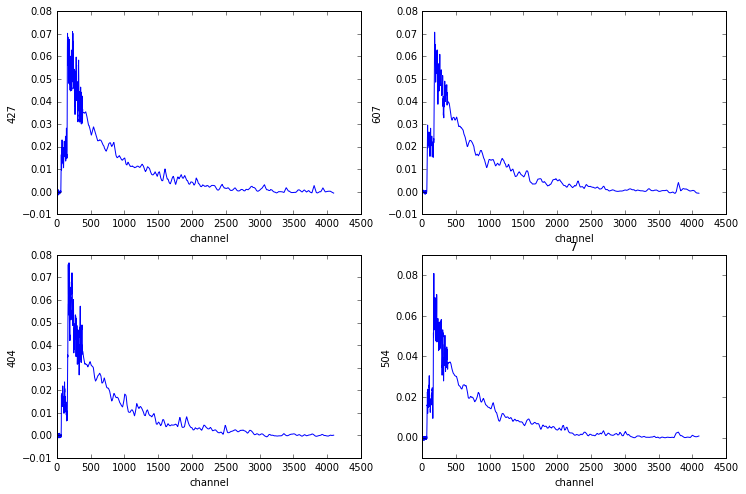

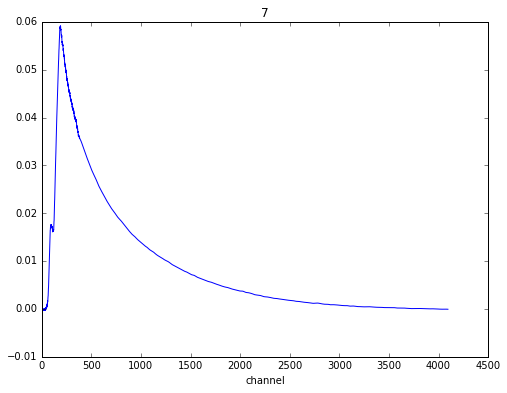

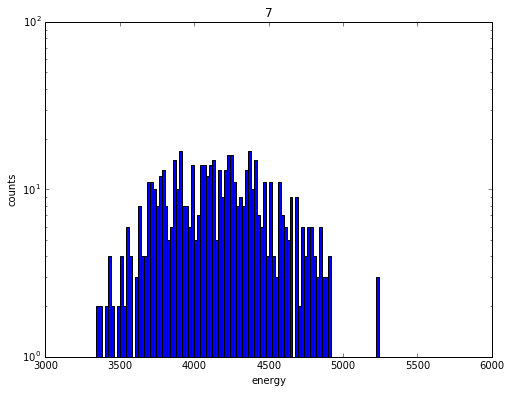

groups=7 counts= 617


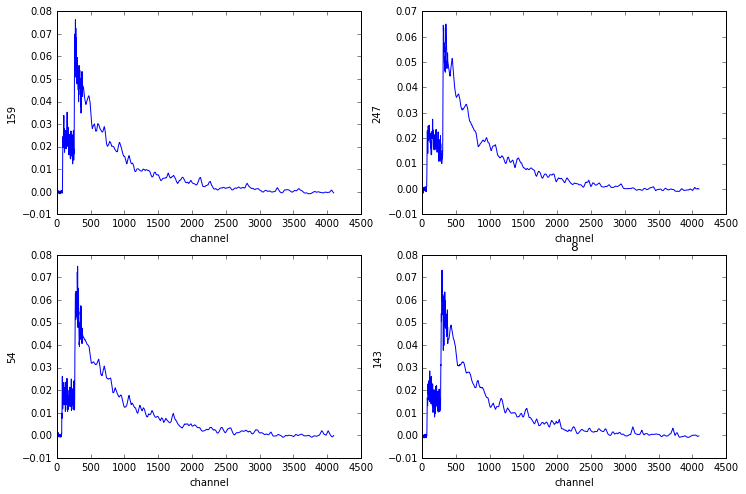

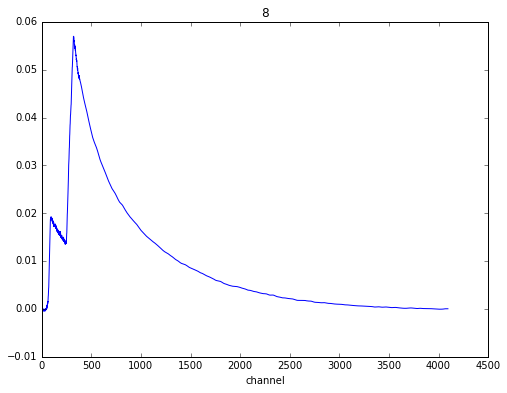

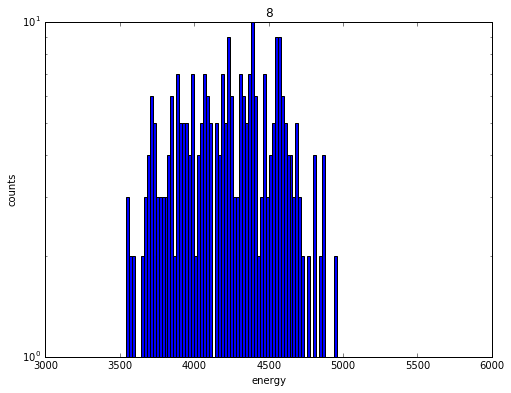

groups=8 counts= 300


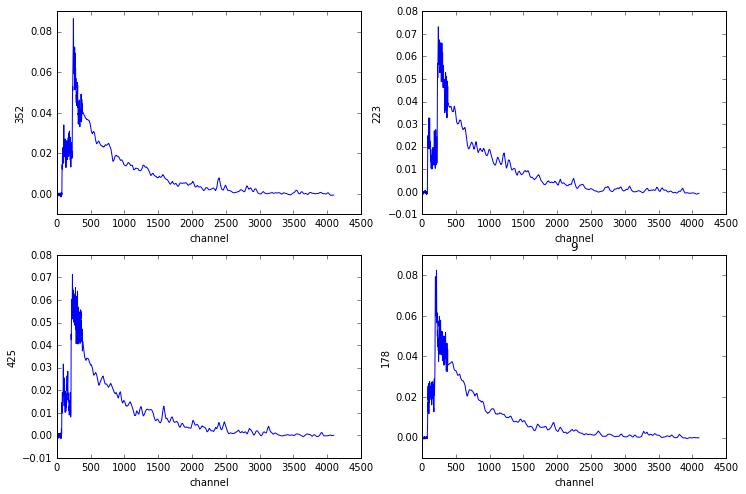

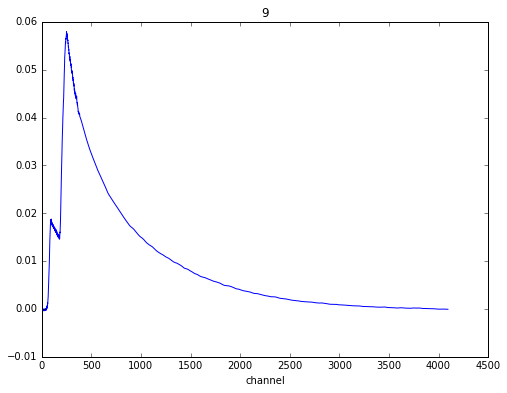

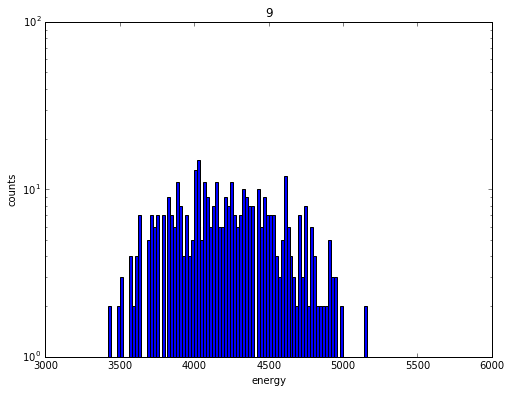

groups=9 counts= 439


In [5]:
sel2 = np.load("selector_psd.npy")

for i in np.unique(sel2):
    file = Waveform2(path="../Run9psd15_3000.root", selector=i)
    r1 = np.random.randint(len(file[:][1])) 
    r2 = np.random.randint(len(file[:][1]))
    r3 = np.random.randint(len(file[:][1]))
    r4 = np.random.randint(len(file[:][1]))
    plt.figure(figsize=(12,8))
    plt.subplot(221)
    plt.plot(file[r1][0])
    plt.ylabel("{}".format(r1))
    plt.xlabel("channel")
    plt.subplot(222)
    plt.plot(file[r2][0])
    plt.ylabel("{}".format(r2))
    plt.xlabel("channel")
    plt.subplot(223)
    plt.plot(file[r3][0])
    plt.ylabel("{}".format(r3))
    plt.xlabel("channel")
    plt.subplot(224)
    plt.plot(file[r4][0])
    plt.ylabel("{}".format(r4))
    plt.xlabel("channel")
    plt.savefig("fig/wave_psd{}".format(i))
    plt.title("{}".format(i))
    plt.show()
    
    
    plt.figure(figsize=(8,6))
    plt.plot(np.mean(file[:][0],axis=0))
    plt.xlabel("channel")
    plt.savefig("fig/avwave_psd{}".format(i))
    plt.title("{}".format(i))
    plt.show()
    
    plt.figure(figsize=(8,6))
    plt.hist(file[:][1], bins=np.arange(3000,6000,20))
    plt.yscale("log")
    plt.xlabel("energy")
    plt.ylabel("counts")
    plt.savefig("fig/hist_psd{}".format(i))
    plt.title("{}".format(i))
    plt.show()
    print("groups={}".format(i), "counts=",len(file[:][1]))

In [4]:
e2 = Waveform2(path="../Run9psd15_3000.root", selector=2)
e6 = Waveform2(path="../Run9psd15_3000.root", selector=6)
e7 = Waveform2(path="../Run9psd15_3000.root", selector=7)
e8 = Waveform2(path="../Run9psd15_3000.root", selector=8)
e9 = Waveform2(path="../Run9psd15_3000.root", selector=9)

In [7]:
et = np.concatenate((e6[:][1],e7[:][1],e8[:][1],e9[:][1]),axis=0)
et2 = np.concatenate((e2[:][1],e6[:][1],e7[:][1],e8[:][1],e9[:][1]),axis=0)
# print(e6[:][1].shape)
# print(e7)
print(et.shape)
print(et2.shape)

(1776,)
(2416,)


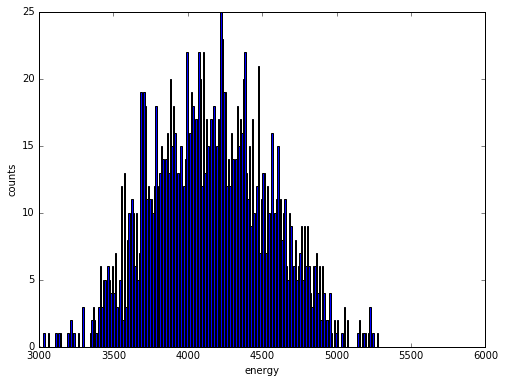

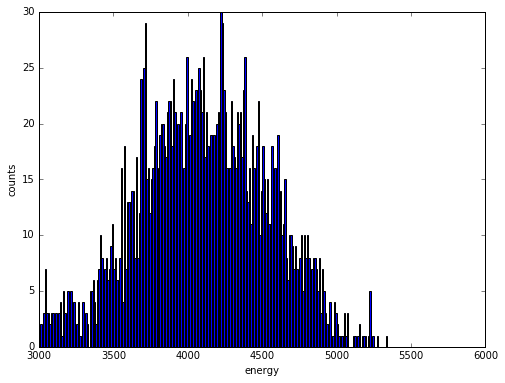

In [8]:
plt.figure(figsize=(8,6))
plt.hist(et, bins=np.arange(3000,6000,10))
# plt.yscale("log")
plt.xlabel("energy")
plt.ylabel("counts")
plt.savefig("dp.png")
plt.show()
plt.figure(figsize=(8,6))
plt.hist(et2, bins=np.arange(3000,6000,10))
# plt.yscale("log")
plt.xlabel("energy")
plt.ylabel("counts")
plt.savefig("dp2.png")
plt.show()